In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import plotly
import plotly.graph_objects as go
import time
import math
from mpl_toolkits import mplot3d

In [2]:
x1=[]
x2=[]
y=[]
label0=[]
label1=[]
m=0

labels={"Alaska":0,"Canada":1}
f = open("../ass1_data/data/q4/q4x.dat", "r")

for i in f:
    #print(x.strip())
    ''' a is matrix of m*2 size, where the first column is 1 '''
    i=i.strip()
    temp=i.split("  ")
    x1.append(temp[0])
    x2.append(temp[1])

f.close()

f = open("../ass1_data/data/q4/q4y.dat","r")

for i in f:
    #print(i.strip())
    #y is vector of single dimension
    str1 = i.strip()
    y.append(labels[str1])
f.close()

m = len(y)

for i in range(len(y)):
    if(y[i]==0):
        label0.append(i)
    elif(y[i]==1):
        label1.append(i)

# print(x1,x2,y)

In [3]:
x1=np.array(x1).astype(float)
x1m=np.mean(x1)
x1d=np.std(x1)
x1=(x1-x1m)/x1d

x2=np.array(x2).astype(float)
x2m=np.mean(x2)
x2d=np.std(x2)
x2=(x2-x2m)/x2d

y=np.array(y).astype(float)

In [4]:
X=np.column_stack((x1,x2)).T
Y=y.reshape(100,1).T

In [5]:
# print(X)
# print(Y.shape)

In [6]:
phi = len(label1)/m
# print(phi)

In [7]:
mu0 = 0
for i in range(len(label0)):
    index = label0[i]
    mu0 += X[:,index]
mu0 = mu0/len(label0)
mu0 = mu0.reshape(2,1)

In [8]:
print("mu0:",mu0)

mu0: [[-0.75529433]
 [ 0.68509431]]


In [9]:
mu1 = 0
for i in range(len(label1)):
    index = label1[i]
    mu1 += X[:,index]
mu1 = mu1/len(label1)
mu1 = mu1.reshape(2,1)

In [10]:
print("mu1:",mu1)

mu1: [[ 0.75529433]
 [-0.68509431]]


In [11]:
sigma = 0
for i in range(m):
    temp = 0
    if(Y[0,i]==0):
        temp = X[:,i:i+1] - mu0
    elif(Y[0,i]==1):
        temp = X[:,i:i+1] - mu1
#     print(temp.shape,X[:,i:i+1].shape,mu0.shape)
    sigma += np.dot(temp,temp.T)
#     print(temp.T.shape)
sigma /= m

In [12]:
print("sigma:",sigma)

sigma: [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


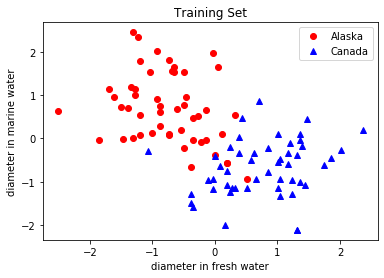

In [13]:
x_label0 = np.array([X[0:2,x] for x in label0])
x_label1 = np.array([X[0:2,x] for x in label1])

plt.plot(x_label0[:, 0], x_label0[:, 1], 'ro', marker='o', label='Alaska')
plt.plot(x_label1[:, 0], x_label1[:, 1], 'bo', marker='^', label='Canada')
plt.xlabel('diameter in fresh water')
plt.ylabel('diameter in marine water')
plt.title('Training Set')
plt.legend()

(2, 1)
(1, 1000)


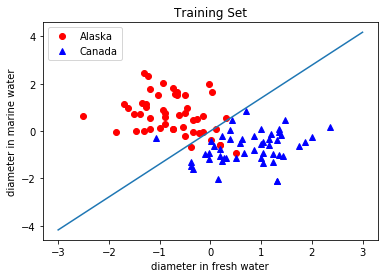

[[1.11022302e-15]] -3.3892545212594527 2.438583994362328


In [14]:
x_label0 = np.array([X[0:2,x] for x in label0])
x_label1 = np.array([X[0:2,x] for x in label1])

plt.plot(x_label0[:, 0], x_label0[:, 1], 'ro', marker='o', label='Alaska')
plt.plot(x_label1[:, 0], x_label1[:, 1], 'bo', marker='^', label='Canada')
plt.xlabel('diameter in fresh water')
plt.ylabel('diameter in marine water')
plt.title('Training Set')
plt.legend()
# plt.show(block=False)

sigma_inv = np.linalg.inv(sigma) 
c = 0.5 * (((mu0.T).dot(sigma_inv)).dot(mu0) -
               ((mu1.T).dot(sigma_inv)).dot(mu1))
siginv_mu = np.dot(sigma_inv, mu0-mu1)
print(siginv_mu.shape)
x_line = np.linspace(-3,3,1000)
y_line = (c - siginv_mu[0,0]*x_line)/siginv_mu[1,0]
print(y_line.shape)
y_line = y_line.T
plt.plot(x_line,y_line,label="linear decision boundary")
plt.show()
print(c, siginv_mu[0,0],siginv_mu[1,0])

In [15]:
sigma0 = 0
for i in range(len(label0)):
    temp = 0
    index = label0[i]
    temp = X[:,index:index+1] - mu0
#     elif(Y[0,i]==1):
#         temp = X[:,i:i+1] - mu1
#     print(temp.shape,X[:,i:i+1].shape,mu0.shape)
    sigma0 += np.dot(temp,temp.T)
#     print(temp.T.shape)
sigma0 /= len(label0)
print("sigma0:",sigma0)

sigma0: [[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]


In [16]:
sigma1 = 0
for i in range(len(label1)):
    temp = 0
    index = label1[i]
    temp = X[:,index:index+1] - mu1
#     elif(Y[0,i]==1):
#         temp = X[:,i:i+1] - mu1
#     print(temp.shape,X[:,i:i+1].shape,mu0.shape)
    sigma1 += np.dot(temp,temp.T)
#     print(temp.T.shape)
sigma1 /= len(label1)
print("sigma1:",sigma1)

sigma0_inv = np.linalg.pinv(sigma0)
sigma1_inv = np.linalg.pinv(sigma1)

sigma1: [[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


In [17]:
# calculating value of y based on equation y=quadratic_equation(x)
# 
def calc_quadratic(x):

    p1 = phi
    p0 = float(1 - phi)

    a = sigma1_inv[0][0]
    b = sigma1_inv[0][1]
    c = sigma1_inv[1][0]
    d = sigma1_inv[1][1]

    p = sigma0_inv[0][0]
    q = sigma0_inv[0][1]
    r = sigma0_inv[1][0]
    s = sigma0_inv[1][1]

    C = np.log(np.linalg.det(sigma0)) - np.log(np.linalg.det(sigma1)) + 2.0*np.log(p1) - 2.0*np.log(p0)
    u = d - s
    v = (-2.0 * d * mu1[1]) + (2.0 * s * mu0[1]) + (b * x) - (b * mu1[0]) \
        + (c * x) - (c * mu1[0]) - (q * x) + (q * mu0[0]) - (r * x) + (r * mu0[0])

    w = C - (a * ((x - mu1[0])**2)) + (p * ((x - mu0[0])**2)) \
        + b*mu1[1]*x + c*mu1[1]*x \
        - q*mu0[1]*x - r*mu0[1]*x \
        - d*(mu1[1]**2) + s*(mu0[1]**2) \
        - b*mu1[0]*mu1[1] - c*mu1[0]*mu1[1] \
        + q*mu0[1]*mu0[0] + r*mu0[1]*mu0[0]
    
    D = np.sqrt((v**2) + (4*u*w))
    res = [(0.5*(-v + D))/u , (0.5*(-v - D))/u ]
    
#     print(u, v, w)
    return res

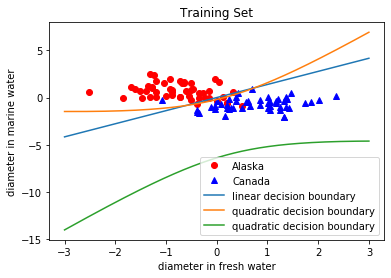

In [18]:
x_label0 = np.array([X[0:2,x] for x in label0])
x_label1 = np.array([X[0:2,x] for x in label1])

plt.plot(x_label0[:, 0], x_label0[:, 1], 'ro', marker='o', label='Alaska')
plt.plot(x_label1[:, 0], x_label1[:, 1], 'bo', marker='^', label='Canada')
plt.xlabel('diameter in fresh water')
plt.ylabel('diameter in marine water')
plt.title('Training Set')
# plt.show(block=False)

sigma_inv = np.linalg.inv(sigma) 
c = 0.5 * (((mu0.T).dot(sigma_inv)).dot(mu0) -
               ((mu1.T).dot(sigma_inv)).dot(mu1))
siginv_mu = np.dot(sigma_inv, mu0-mu1)
# print(siginv_mu.shape)
x_line = np.linspace(-3,3,1000)
y_line = (c - siginv_mu[0,0]*x_line)/siginv_mu[1,0]
# print(y_line.shape)
y_line = y_line.T
plt.plot(x_line,y_line,label="linear decision boundary")

x_quad = np.linspace(-3,3,500)
y_quad1 = []
y_quad2 = []
for i in range(500):
    res = calc_quadratic(x_quad[i])
#     print(res)
    y_quad1.append(res[0])
    y_quad2.append(res[1])

print()
plt.plot(x_quad,y_quad1,label="quadratic decision boundary")
plt.plot(x_quad,y_quad2,label="quadratic decision boundary")
plt.legend()
plt.show()